In [ ]:
pip install textblob

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv("friends_script.csv")
df

,season,episode,char,line
0,8,7,by,"R. Lee Fleming, Jr.\nTranscribed"
1,8,7,by,Eric Aasen\nDutch Phrases
2,8,7,by,Kenny Walgraef\n\n[Scene
3,8,7,Monica,Hey.
4,8,7,Chandler,Hey.\n(Monica notices something.)
...,...,...,...,...
61845,4,2,Phoebe,"Come on, Mom, Ill take you home."
61846,4,2,Rachel,Ill go with you.
61847,4,2,Monica,Me too. (they all leave)
61848,4,2,Ross,"Oh! Y'know, Ive got an extra futon."


#### Droping all of these rows by removing the character 'by'

In [53]:
df = df[df.char != 'by']
df

,season,episode,char,line
3,8,7,Monica,Hey.
4,8,7,Chandler,Hey.\n(Monica notices something.)
5,8,7,Monica,Oh my God! You cleaned! (Gasps) Look at these...
6,8,7,Chandler,"Yknow uh, I didnt actually do this."
7,8,7,Monica,"Oh no, was I cleaning in my sleep again?"
...,...,...,...,...
61845,4,2,Phoebe,"Come on, Mom, Ill take you home."
61846,4,2,Rachel,Ill go with you.
61847,4,2,Monica,Me too. (they all leave)
61848,4,2,Ross,"Oh! Y'know, Ive got an extra futon."


In [55]:
df['char'].unique()[20:30]

array(['ROSS', 'MONICA', 'PHOEBE', 'RICHARD', 'PLANNER', 'WINEBURG',
       'MINDY', 'BARRY', 'MAN', '9'], dtype=object)

In [56]:
df.loc[:, 'char'] = df['char'].replace({
    'Chandler': 'Chandler', 'CHANDLER': 'Chandler', 'Chandlers': 'Chandler', 'chandler': 'Chandler',
    'Joey': 'Joey', 'JOEY': 'Joey',
    'Monica': 'Monica', 'MONICA': 'Monica', 'MOnica': 'Monica', 'MNCA': 'Monica',
    'Phoebe': 'Phoebe', 'PHOEBE': 'Phoebe', 'Pheebs': 'Phoebe',
    'Rachel': 'Rachel', 'RACHEL': 'Rachel', 'RACH': 'Rachel', 'RAHCEL': 'Rachel', 'Racel': 'Rachel', 'Rache': 'Rachel',
    'Ross': 'Ross', 'RUSS': 'Ross', 'ROSS': 'Ross'
})


This code filters the DataFrame df to include only rows where the value in the 'char' column matches one of the specified characters in the char list. Here's a detailed breakdown of what it does:

In [57]:
char = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']
df = df[df['char'].isin(char)]

In [58]:
df

,season,episode,char,line
3,8,7,Monica,Hey.
4,8,7,Chandler,Hey.\n(Monica notices something.)
5,8,7,Monica,Oh my God! You cleaned! (Gasps) Look at these...
6,8,7,Chandler,"Yknow uh, I didnt actually do this."
7,8,7,Monica,"Oh no, was I cleaning in my sleep again?"
...,...,...,...,...
61845,4,2,Phoebe,"Come on, Mom, Ill take you home."
61846,4,2,Rachel,Ill go with you.
61847,4,2,Monica,Me too. (they all leave)
61848,4,2,Ross,"Oh! Y'know, Ive got an extra futon."


## What is Sentiment Analysis?

Sentiment analysis is a process used in natural language processing (NLP) to determine the emotional tone or opinion expressed in a piece of text. For example:

- "I love this movie!" → Positive sentiment
-   "This is awful." → Negative sentiment


### Polarity: Measures how positive or negative the text is.

- Ranges from -1 (completely negative) to 1 (completely positive).
- Example:
    - "I hate this." → Polarity = -1 (very negative)
    - "This is amazing!" → Polarity = 1 (very positive)
    - "It’s okay." → Polarity = 0 (neutral sentiment)

### Subjectivity: Measures how subjective or objective the text is.

- Ranges from 0 (completely objective, factual) to 1 (completely subjective, opinionated).
- Example:
    - "The Earth revolves around the Sun." → Subjectivity = 0 (objective)
    - "I think this movie is great!" → Subjectivity = 1 (subjective)

In [59]:
df.loc[:, 'sentiment'] = df['line'].apply(lambda x: TextBlob(x).sentiment[0])

/tmp/ipykernel_95019/3042685871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sentiment'] = df['line'].apply(lambda x: TextBlob(x).sentiment[0])


In [47]:
df['season'] = df['season'].apply(lambda x: int(x))
df['episode'] = df['episode'].apply(lambda x: int(x))

/tmp/ipykernel_95019/2700718059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].apply(lambda x: int(x))
/tmp/ipykernel_95019/2700718059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episode'] = df['episode'].apply(lambda x: int(x))


In [60]:
df["season"].unique()

array(['8', '7', '2', '4', '9', '5', '3', '6', '1', '10'], dtype=object)

## The Most Popular Friend

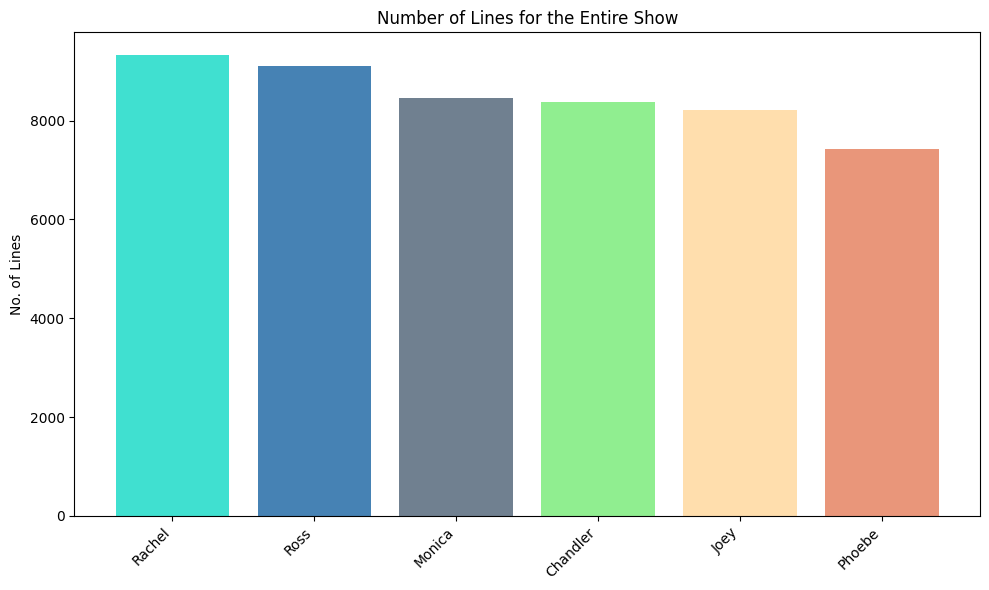

In [61]:

# Aggregate the number of lines spoken by each character
lines_per_char = df.groupby('char')['line'].count().reset_index()
lines_per_char = lines_per_char.rename(columns={'line': 'spoken_lines'})
lines_per_char = lines_per_char.sort_values(by='spoken_lines', ascending=False)

# Define bar colors
COLORS = ['#40E0D0', '#4682B4', '#708090', '#90EE90', '#FFDEAD', '#E9967A']

# Plot the number of lines spoken by each character
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
plt.bar(
    x=lines_per_char['char'],
    height=lines_per_char['spoken_lines'],
    color=COLORS[:len(lines_per_char)]  # Ensure color list matches the number of bars
)
plt.title('Number of Lines for the Entire Show')
plt.ylabel('No. of Lines')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
fig.tight_layout()

plt.show()

## Number of lines per season

/tmp/ipykernel_95019/1709599886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].astype(int)


Lines Dictionary:  {'Chandler': {1: 824, 2: 690, 3: 827, 4: 915, 5: 942, 6: 1039, 7: 850, 8: 676, 9: 929, 10: 692}, 'Joey': {1: 647, 2: 666, 3: 790, 4: 822, 5: 940, 6: 909, 7: 935, 8: 911, 9: 869, 10: 735}, 'Monica': {1: 893, 2: 792, 3: 854, 4: 768, 5: 918, 6: 904, 7: 904, 8: 813, 9: 918, 10: 688}, 'Phoebe': {1: 647, 2: 590, 3: 799, 4: 713, 5: 816, 6: 788, 7: 805, 8: 772, 9: 807, 10: 692}, 'Rachel': {1: 856, 2: 817, 3: 932, 4: 916, 5: 921, 6: 1001, 7: 1102, 8: 1089, 9: 912, 10: 776}, 'Ross': {1: 958, 2: 893, 3: 1079, 4: 815, 5: 874, 6: 918, 7: 826, 8: 984, 9: 898, 10: 869}}


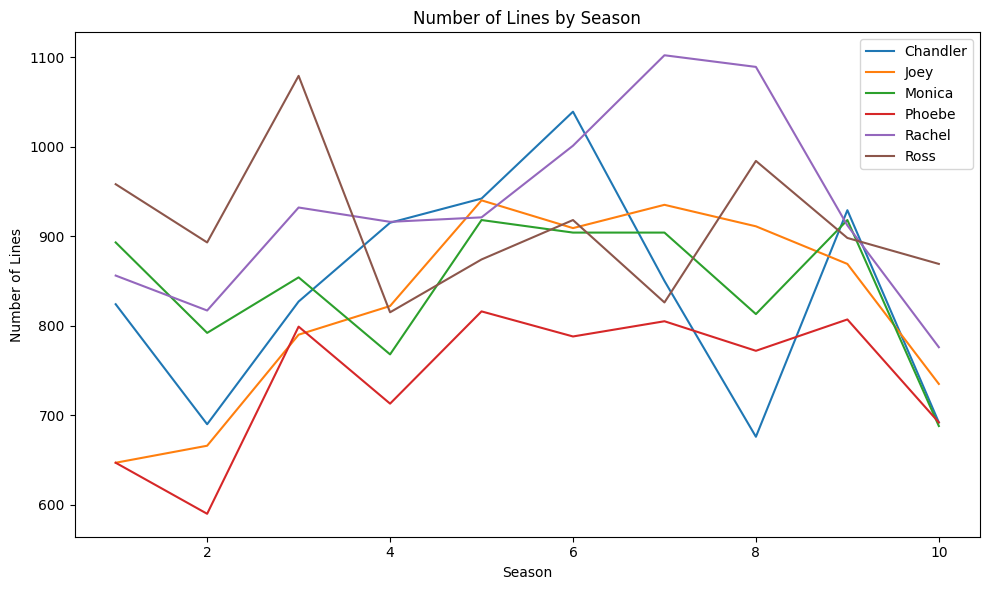

In [63]:

# Filter the DataFrame to include only the characters you're interested in
characters = ['Rachel', 'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe']
filtered_df = df[df['char'].isin(characters)]

# Group by character and season, then count the lines
lines_per_season = filtered_df.groupby(['season', 'char'])['line'].count().reset_index()

# Create a dictionary to store the number of lines per season for each character
lines_dict = {}
for _, row in lines_per_season.iterrows():
    char = row['char']
    season = row['season']
    total_lines = row['line']
    
    if char not in lines_dict:
        lines_dict[char] = {}
    
    # Assign the total_lines to the corresponding season
    lines_dict[char][season] = total_lines

# Check if lines_dict is populated
print("Lines Dictionary: ", lines_dict)

# Plot the data
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10, 8)

for char in lines_dict.keys():
    x1 = sorted(list(lines_dict[char].keys()))  # Sort seasons
    y1 = [lines_dict[char][season] for season in x1]  # Corresponding line counts
    
    plt.plot(x1, y1, label=char)

plt.xlabel('Season')
plt.ylabel('Number of Lines')
plt.title('Number of Lines by Season')
plt.legend(loc=1)
plt.tight_layout()

plt.show()


Lines Dictionary:  {'Chandler': {1: 824, 2: 690, 3: 827, 4: 915, 5: 942, 6: 1039, 7: 850, 8: 676, 9: 929, 10: 692}, 'Joey': {1: 647, 2: 666, 3: 790, 4: 822, 5: 940, 6: 909, 7: 935, 8: 911, 9: 869, 10: 735}, 'Monica': {1: 893, 2: 792, 3: 854, 4: 768, 5: 918, 6: 904, 7: 904, 8: 813, 9: 918, 10: 688}, 'Phoebe': {1: 647, 2: 590, 3: 799, 4: 713, 5: 816, 6: 788, 7: 805, 8: 772, 9: 807, 10: 692}, 'Rachel': {1: 856, 2: 817, 3: 932, 4: 916, 5: 921, 6: 1001, 7: 1102, 8: 1089, 9: 912, 10: 776}, 'Ross': {1: 958, 2: 893, 3: 1079, 4: 815, 5: 874, 6: 918, 7: 826, 8: 984, 9: 898, 10: 869}}


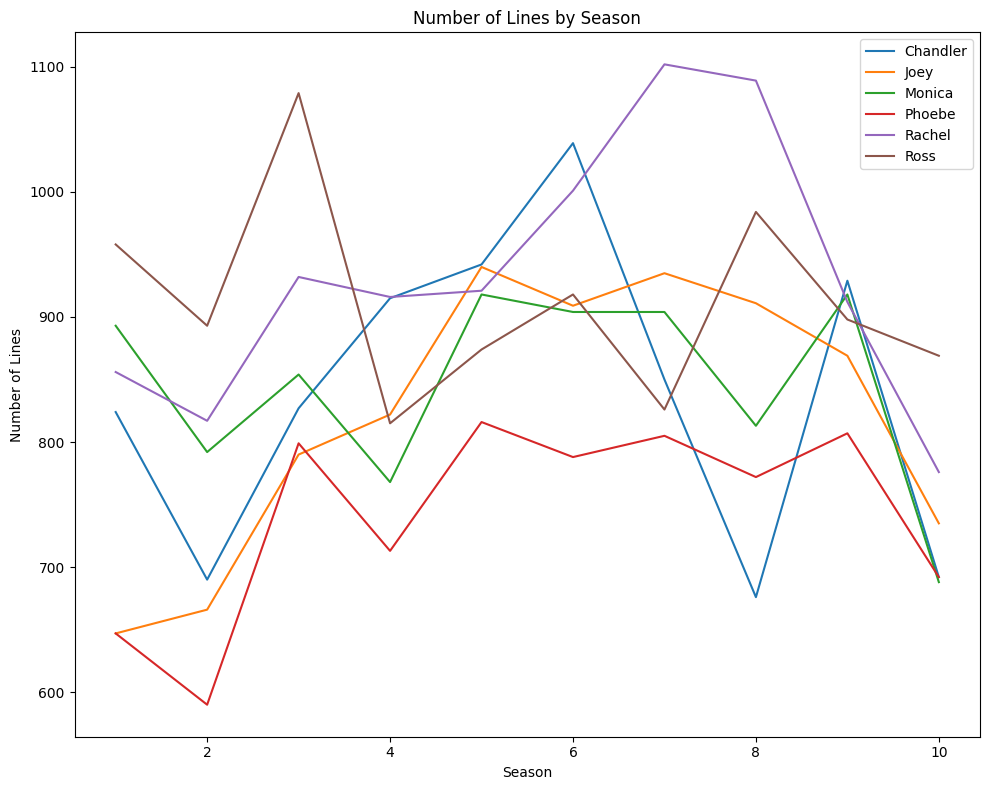

In [65]:
# Filter the DataFrame to include only the characters you're interested in
characters = ['Rachel', 'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe']
filtered_df = df[df['char'].isin(characters)]

# Group by character and season, then count the lines
lines_per_season = filtered_df.groupby(['season', 'char'])['line'].count().reset_index(name='total_lines')

# Create a dictionary to store the number of lines per season for each character
lines_dict = {}
for _, row in lines_per_season.iterrows():
    char = row['char']
    season = row['season']
    total_lines = row['total_lines']
    
    if char not in lines_dict:
        lines_dict[char] = {}
    
    # Assign the total_lines to the corresponding season
    lines_dict[char][season] = total_lines

# Check if lines_dict is populated
print("Lines Dictionary: ", lines_dict)

# Plot the data
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10, 8)

for char in lines_dict.keys():
    x1 = sorted(list(lines_dict[char].keys()))  # Sort seasons
    y1 = [lines_dict[char][season] for season in x1]  # Corresponding line counts
    
    plt.plot(x1, y1, label=char)

plt.xlabel('Season')
plt.ylabel('Number of Lines')
plt.title('Number of Lines by Season')
plt.legend(loc=1)
plt.tight_layout()

plt.show()


### Most Spoken About


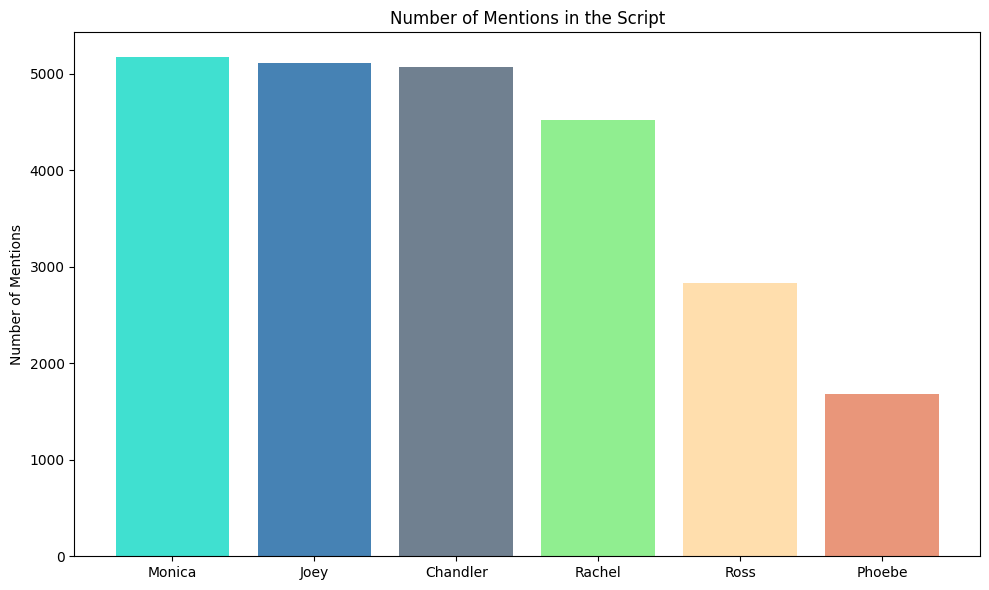

In [69]:

nicknames = [
    ['Rachel', 'Rach'], 
    ['Ross', 'Ross-A-Tron', 'Professor Geller'], 
    ['Monica', 'Mon'],
    ['Chandler', 'Chan'],
    ['Joey', 'Joe'], 
    ['Phoebe', 'Phoebes']
]

# Initialize a dictionary to store the mention counts
mention_counts = {name_list[0]: 0 for name_list in nicknames}

# Loop through each character and their nicknames
for name_list in nicknames:
    # For each nickname, count its occurrences in the 'line' column
    for name in name_list:
        mentions = df['line'].str.contains(name, case=False, na=False).sum()  # case insensitive
        mention_counts[name_list[0]] += mentions  # Add the mentions to the main character

# Create a sorted list of characters based on mention count
char_mention = sorted(mention_counts.items(), key=lambda x: x[1], reverse=True)

# Plot the results
COLORS = ['#40E0D0', '#4682B4', '#708090', '#90EE90', '#FFDEAD', '#E9967A']  # Colors for bars
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
plt.bar(
    x=[mention[0] for mention in char_mention],  # Character names
    height=[mention[1] for mention in char_mention],  # Number of mentions
    color=COLORS
)
plt.title('Number of Mentions in the Script')
plt.ylabel('Number of Mentions')
fig.tight_layout()

plt.show()


### Largest Vocabulary

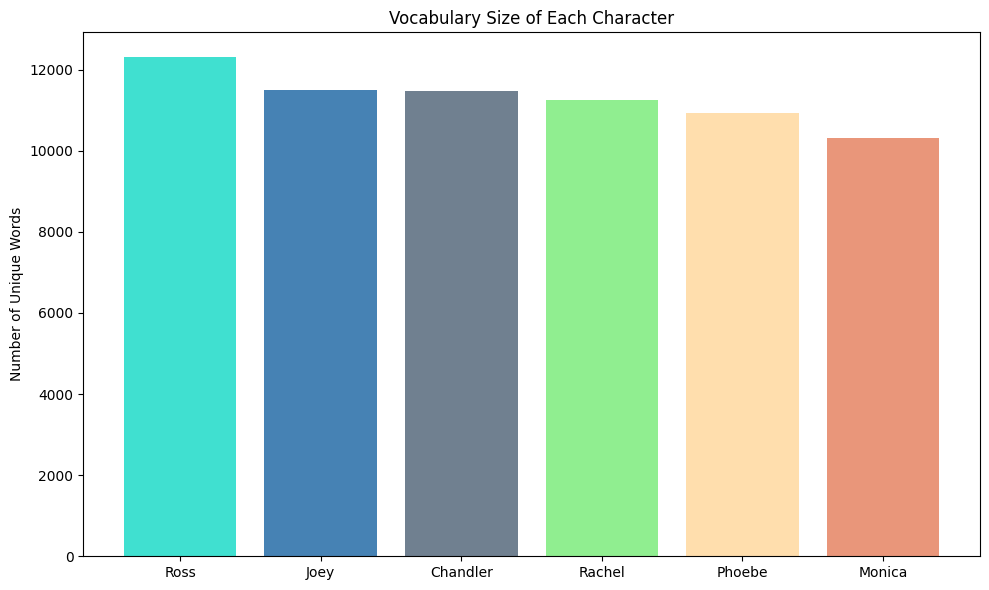

In [72]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to remove all non-alphabetical characters and keep spaces
def alphanumonly(text):
    '''Remove all non-letters from string'''
    regex = re.compile('[^a-zA-Z ]')
    return regex.sub('', text)

# Assuming df is already defined and contains your data

# Filter the DataFrame to include only the characters you're interested in
characters = ['Rachel', 'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe']
filtered_df = df[df['char'].isin(characters)]

# Initialize sets to store vocabulary for each character
monica_vocab = set()
chandler_vocab = set()
ross_vocab = set()
phoebe_vocab = set()
rachel_vocab = set()
joey_vocab = set()

# Process each line for each character
for _, row in filtered_df.iterrows():
    char = row['char']
    line = alphanumonly(row['line']).strip()  # Clean the line
    
    # Split the line into words and add to the corresponding character's vocabulary
    split_words = line.split(' ')
    for word in split_words:
        if char == 'Monica':
            monica_vocab.add(word)
        elif char == 'Joey':
            joey_vocab.add(word)
        elif char == 'Ross':
            ross_vocab.add(word)
        elif char == 'Phoebe':
            phoebe_vocab.add(word)
        elif char == 'Chandler':
            chandler_vocab.add(word)
        elif char == 'Rachel':
            rachel_vocab.add(word)

# Create a list of character names and their vocabulary sizes
char_vocab_length = ['Ross', 'Joey', 'Chandler', 'Rachel', 'Phoebe', 'Monica']
vocab_lengths = [len(ross_vocab), len(joey_vocab), len(chandler_vocab), len(rachel_vocab), len(phoebe_vocab), len(monica_vocab)]

# Plot the results
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
plt.bar(
    x=char_vocab_length,
    height=vocab_lengths,
    color=['#40E0D0', '#4682B4', '#708090', '#90EE90', '#FFDEAD', '#E9967A']  # Colors for bars
)
plt.title('Vocabulary Size of Each Character')
plt.ylabel('Number of Unique Words')
plt.tight_layout()

plt.show()


## Ross and Rachel Sentiments throughout the season

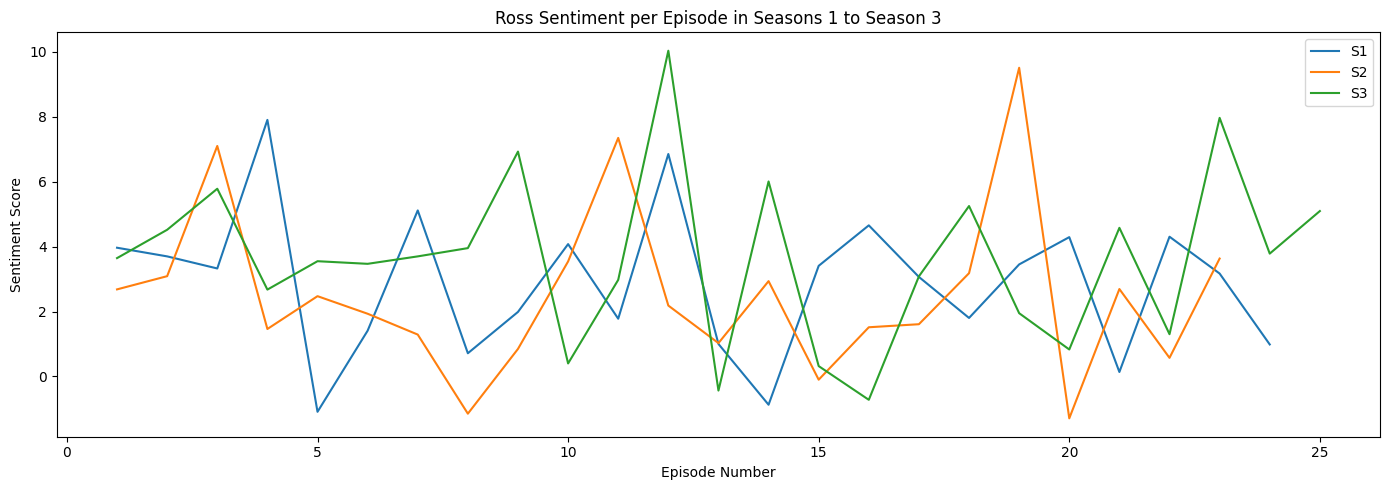

In [73]:

# Filter the DataFrame to include only rows where the character is 'Ross'
ross_df = df[df['char'] == 'Ross']

# Group by season and episode, then sum the sentiment for each combination of season and episode
ross_sentiments = ross_df.groupby(['season', 'episode'])['sentiment'].sum().reset_index()

# Create a dictionary to store the sentiment per season and episode
ross_sentiment = {}

# Process each row in the grouped DataFrame
for _, row in ross_sentiments.iterrows():
    season_episode = f'S{int(row["season"])}E{int(row["episode"])}'
    if row["season"] == 10:  # Adjust for special season format
        season_episode = f'STENE{int(row["episode"])}'
    ross_sentiment[season_episode] = row['sentiment']

# Plotting
plt.rcParams['figure.figsize'] = (14, 5)

# Define the seasons you want to plot
seasons = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'STEN']

# Loop through the first three seasons and plot the sentiment data
for season in seasons[0:3]:
    # Filter for episodes that start with the current season
    sentiments = list(filter(lambda item: item[0].startswith(season), ross_sentiment.items()))
    
    # X-axis: Episode numbers
    x1 = list(range(1, len(sentiments) + 1))
    
    # Y-axis: Sentiment scores
    y1 = [x[1] for x in sentiments]
    
    # Plot the sentiment for each season
    plt.plot(x1, y1, label=season)

# Add labels and title to the plot
plt.xlabel('Episode Number')
plt.ylabel('Sentiment Score')
plt.title('Ross Sentiment per Episode in Seasons 1 to Season 3')
plt.legend(loc=1)
plt.tight_layout()

# Display the plot
plt.show()


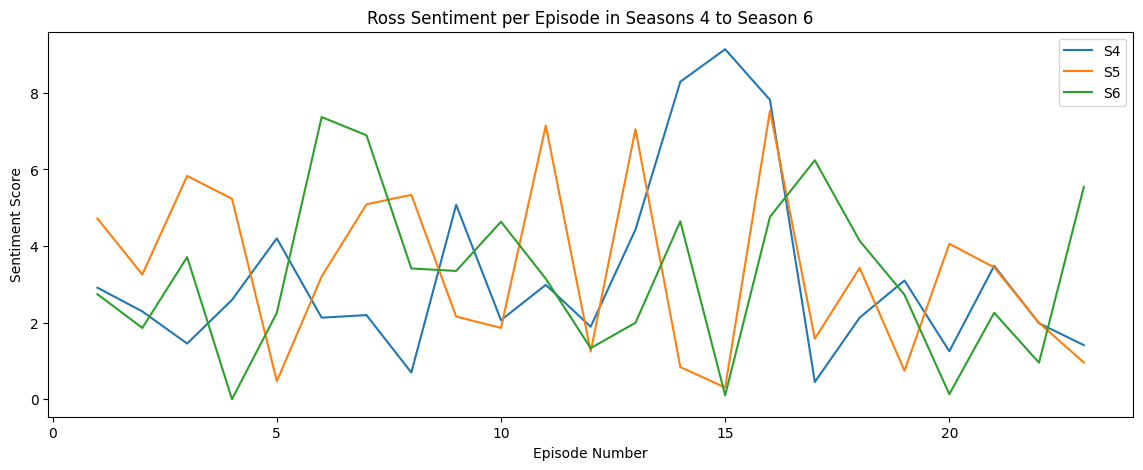

In [74]:
for season in seasons[3:6]:
    sentiments = list(filter(lambda item: item[0].startswith(season), ross_sentiment.items())) 
    x1 = list(range(1, len(sentiments)+1))
    y1 = [x[1] for x in sentiments]
    plt.plot(x1, y1, label = season)
    
plt.xlabel('Episode Number')
plt.ylabel('Sentiment Score')
plt.title('Ross Sentiment per Episode in Seasons 4 to Season 6')
plt.legend(loc=1)
plt.show()

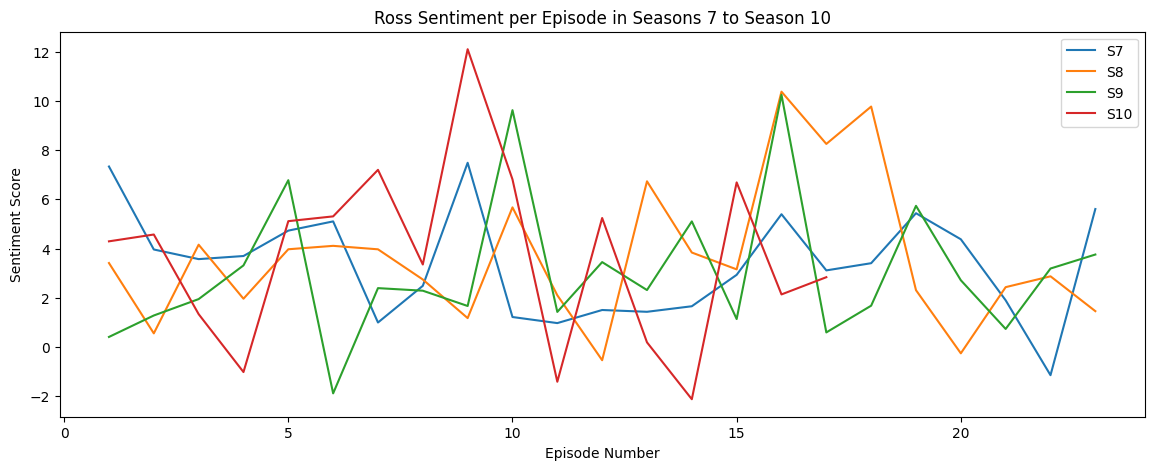

In [75]:
for season in seasons[6:]:
    
    sentiments = list(filter(lambda item: item[0].startswith(season), ross_sentiment.items())) 
    x1 = list(range(1, len(sentiments)+1))
    y1 = [x[1] for x in sentiments]
    
    if season == 'STEN': season = 'S10'
    plt.plot(x1, y1, label = season)
    
plt.xlabel('Episode Number')
plt.ylabel('Sentiment Score')
plt.title('Ross Sentiment per Episode in Seasons 7 to Season 10')
plt.legend(loc=1)
plt.show()